<a href="https://colab.research.google.com/github/Ankurac7/ML-Models/blob/main/K_means_labexam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
from google.colab import drive
drive.mount("/content/drive/")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/K-Means Dataset for Lab test.csv")
df=df.dropna()

df



,W,X,Y,Z,Batsman
0,0.000000,0.416667,0.016949,0.000000,Kohli
1,0.027778,0.500000,0.050847,0.041667,Kohli
2,0.166667,0.208333,0.593220,0.666667,Ganguly
3,0.166667,0.166667,0.389831,0.375000,Tendulkar
4,0.166667,0.458333,0.084746,0.041667,Kohli
...,...,...,...,...,...
130,0.944444,0.416667,0.864407,0.916667,Ganguly
131,0.944444,0.250000,1.000000,0.916667,Ganguly
132,0.944444,0.750000,0.966102,0.875000,Ganguly
133,0.944444,0.333333,0.966102,0.791667,Ganguly


In [ ]:
df=df.drop('Batsman',1) #dropping column "Batsman"
df

<ipython-input-19-fbabbb5eb666>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df=df.drop('Batsman',1) #dropping column "Batsman"


,W,X,Y,Z
0,0.000000,0.416667,0.016949,0.000000
1,0.027778,0.500000,0.050847,0.041667
2,0.166667,0.208333,0.593220,0.666667
3,0.166667,0.166667,0.389831,0.375000
4,0.166667,0.458333,0.084746,0.041667
...,...,...,...,...
130,0.944444,0.416667,0.864407,0.916667
131,0.944444,0.250000,1.000000,0.916667
132,0.944444,0.750000,0.966102,0.875000
133,0.944444,0.333333,0.966102,0.791667


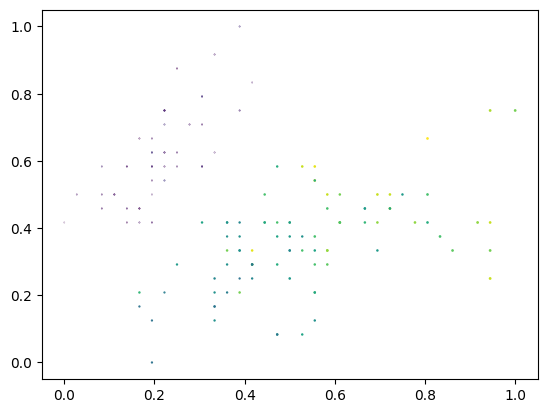

In [ ]:
plt.scatter(df.W,df.X,df.Y,df.Z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

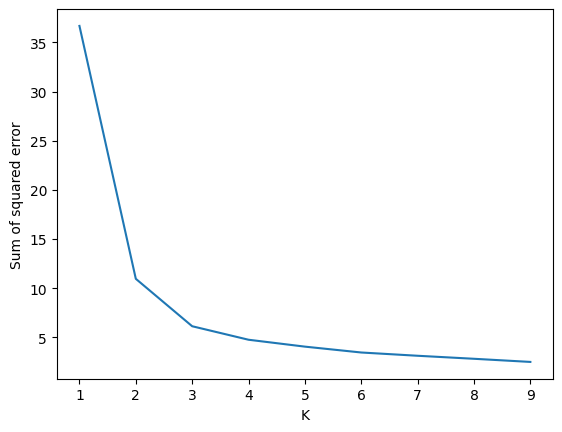

In [ ]:
sse = []
k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['W','X','Y','Z']])
    sse.append(km.inertia_)

#elbow curve

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The optimal value of k is: 2


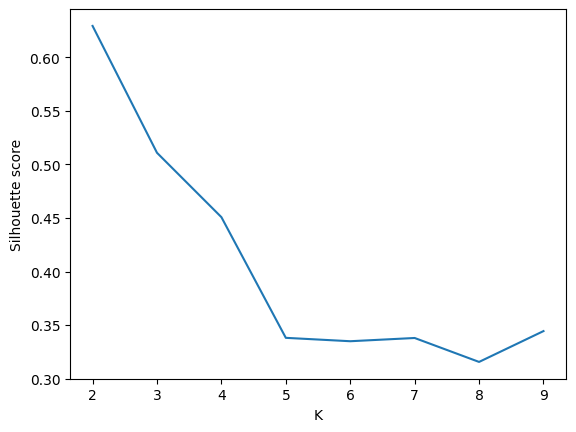

In [ ]:
silhouette_scores = []
k_rng = range(2,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['W','X','Y','Z']])
    y_pred = km.predict(df[['W','X','Y','Z']])
    score = silhouette_score(df[['W','X','Y','Z']], y_pred)
    silhouette_scores.append(score)

#silhouette curve

plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.plot(k_rng, silhouette_scores)

best_k = k_rng[np.argmax(silhouette_scores)]
print("The optimal value of k is:", best_k)

In [ ]:
#observing the elbow curve we find that the optimal value of k at the elbow is k=3, from the output of silhouette curve we see that the optimal k value is 2.
#so we prefer value of k =3 from elbow method as we can see from our dataset that we have 3 batsmen

In [ ]:
kms = KMeans(n_clusters=3)
y_predicted = kms.fit_predict(df[['W','X','Y','Z']])
y_predicted

df['cluster']=y_predicted


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df.head()

,W,X,Y,Z,cluster
0,0.000000,0.416667,0.016949,0.000000,0
1,0.027778,0.500000,0.050847,0.041667,0
2,0.166667,0.208333,0.593220,0.666667,1
3,0.166667,0.166667,0.389831,0.375000,1
4,0.166667,0.458333,0.084746,0.041667,0


In [ ]:
km.cluster_centers_

array([[0.64285714, 0.49107143, 0.77118644, 0.89583333],
       [0.16845878, 0.54435484, 0.07654456, 0.05510753],
       [0.2962963 , 0.19444444, 0.47344633, 0.44166667],
       [0.29960317, 0.7827381 , 0.08595642, 0.07440476],
       [0.42438272, 0.38194444, 0.55838041, 0.52314815],
       [0.88888889, 0.45075758, 0.90138675, 0.79545455],
       [0.49722222, 0.33958333, 0.70169492, 0.725     ],
       [0.67460317, 0.45238095, 0.63438257, 0.58333333],
       [0.51666667, 0.11666667, 0.60338983, 0.525     ]])

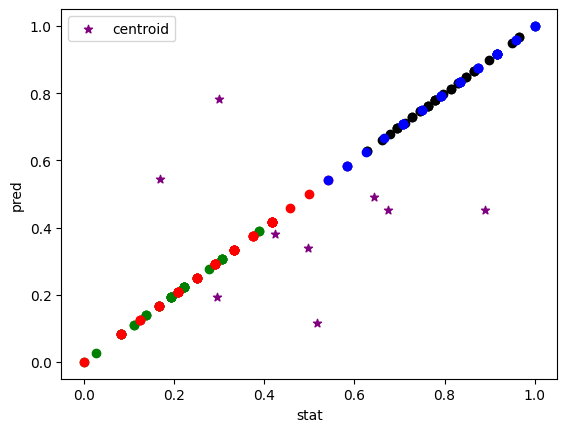

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.W,df1['W'],color='green')
plt.scatter(df2.X,df2['X'],color='red')
plt.scatter(df3.Y,df3['Y'],color='black')
plt.scatter(df3.Z,df3['Z'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('stat')
plt.ylabel('pred')
plt.legend()